In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
df = pd.read_csv('Dataset/train.csv')


In [44]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)


In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Neccessary preparations are done Lets try out a model

In [47]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.25)

In [48]:
# # submission = pd.crosstab(test['Loan_ID'],test['Loan_Status'])
# # submission = test['Loan_ID']+ test['Loan_Status']
# submission = test[['Loan_ID','Loan_Status']]
# submission = pd.DataFrame(submission)
# submission = submission.set_index('Loan_ID')
# submission.to_csv('Dataset/submission.csv')

In [49]:
train  = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)


In [50]:
X = train.drop('Loan_Status',axis = 1)
y = train['Loan_Status']

In [51]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)



In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [53]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(x_test))


322
322
138
138


# Model 1 using Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
#cross validation for svc
cross_val_score(SVC(),x_train,y_train,cv = 5)

array([0.72307692, 0.72307692, 0.71875   , 0.71875   , 0.734375  ])

In [56]:
#cross validation for decision Tree
cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv =5)

array([0.75384615, 0.72307692, 0.734375  , 0.734375  , 0.625     ])

In [57]:
#cross validation for Random forest
cross_val_score(RandomForestClassifier(),x_train,y_train,cv =5)

array([0.78461538, 0.78461538, 0.765625  , 0.84375   , 0.703125  ])

In [58]:
#cross validation for KNN
cross_val_score(KNeighborsClassifier(),x_train,y_train,cv =5)

array([0.64615385, 0.72307692, 0.65625   , 0.703125  , 0.671875  ])

##### We will be using logistic regression for our dataset

In [59]:
from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

0.7753623188405797

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,output)
cm

array([[20, 28],
       [ 3, 87]], dtype=int64)

<AxesSubplot:>

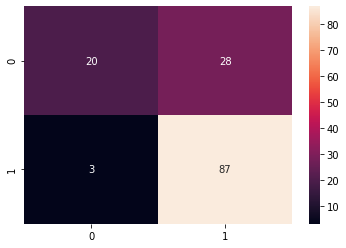

In [62]:
sns.heatmap(cm,annot = True)

## Experiment 4

In [ ]:
from scipy import stats

In [ ]:
data = train.Loan_Status_Y
data

101    1
260    1
218    0
249    1
259    0
      ..
609    1
158    1
277    1
570    1
31     0
Name: Loan_Status_Y, Length: 460, dtype: uint8

In [ ]:
stats.ttest_1samp(data,0)

Ttest_1sampResult(statistic=33.0681115275729, pvalue=1.5515513030335103e-123)

In [ ]:
stats.ttest_1samp(data,1)

Ttest_1sampResult(statistic=-13.88044187577134, pvalue=7.949648132421692e-37)

## Experiment 5

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)



C:\Users\TEMP.NIKITA.000.001.002.003\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

0.7681159420289855

# Accuracy using Kneighbours

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

0.6811594202898551

# Accuracy using RandomForest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

0.8115942028985508

0.8115942028985508

# Accuracy using DecisionTree


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

0.7028985507246377

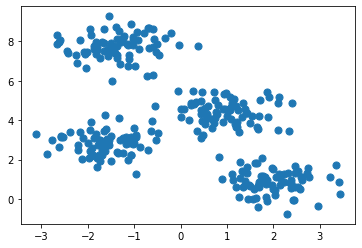

In [ ]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300,centers = 4, cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s= 50)

In [ ]:

model = LogisticRegression()
model.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
output = model.predict(x_test)
accuracy_score(y_test,output)

C:\Users\TEMP.NIKITA.000.001.002.003\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7681159420289855

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,output))

              precision    recall  f1-score   support

           N       0.56      0.22      0.31        46
           Y       0.70      0.91      0.79        92

    accuracy                           0.68       138
   macro avg       0.63      0.57      0.55       138
weighted avg       0.65      0.68      0.63       138

